## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 0.001
EPOCHS = 20 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.9,0.5,0.1]
redice_lr_patient = [9,5,1]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=0.00000001, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.90, reduce_patient: 9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

Epoch 17/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.1860 - acc: 0.5902 - val_loss: 1.4654 - val_acc: 0.4897
Epoch 18/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.1673 - acc: 0.5976 - val_loss: 1.4757 - val_acc: 0.4837
Epoch 19/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.1501 - acc: 0.6032 - val_loss: 1.4633 - val_acc: 0.4886
Epoch 20/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.1342 - acc: 0.6076 - val_loss: 1.4510 - val_acc: 0.4905
Numbers of exp: 2, reduce_factor: 0.90, reduce_patient: 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
____________________________________________________________

Epoch 13/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3176 - acc: 0.5420 - val_loss: 1.5066 - val_acc: 0.4715
Epoch 14/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2989 - acc: 0.5503 - val_loss: 1.4891 - val_acc: 0.4782
Epoch 15/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2805 - acc: 0.5556 - val_loss: 1.4854 - val_acc: 0.4806
Epoch 16/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2627 - acc: 0.5637 - val_loss: 1.4817 - val_acc: 0.4782
Epoch 17/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2453 - acc: 0.5680 - val_loss: 1.4755 - val_acc: 0.4825
Epoch 18/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2285 - acc: 0.5753 - val_loss: 1.4804 - val_acc: 0.4821
Epoch 19/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2112 - acc: 0.5809 - val_loss: 1.4666 - val_acc: 0.4857
Epoch 20/20
50000/50000 [=========

Epoch 11/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3736 - acc: 0.5210 - val_loss: 1.5234 - val_acc: 0.4726
Epoch 12/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3497 - acc: 0.5290 - val_loss: 1.5045 - val_acc: 0.4813
Epoch 13/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3306 - acc: 0.5368 - val_loss: 1.5046 - val_acc: 0.4778

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00036450003972277045.
Epoch 14/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.3079 - acc: 0.5444 - val_loss: 1.4829 - val_acc: 0.4859
Epoch 15/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.2925 - acc: 0.5509 - val_loss: 1.4848 - val_acc: 0.4859

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.00018225001986138523.
Epoch 16/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.2813 - acc: 0.5552 - val_loss: 1.4776 - val_acc: 0.4909
Epoch 17

50000/50000 [==============================] - 2s 31us/step - loss: 1.7299 - acc: 0.3949 - val_loss: 1.7987 - val_acc: 0.3832
Epoch 8/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.6989 - acc: 0.4055 - val_loss: 1.7692 - val_acc: 0.3889
Epoch 9/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.6716 - acc: 0.4150 - val_loss: 1.7549 - val_acc: 0.3936
Epoch 10/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.6477 - acc: 0.4230 - val_loss: 1.7286 - val_acc: 0.4017
Epoch 11/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.6256 - acc: 0.4307 - val_loss: 1.7151 - val_acc: 0.4045
Epoch 12/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.6075 - acc: 0.4370 - val_loss: 1.7044 - val_acc: 0.4049
Epoch 13/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.5890 - acc: 0.4432 - val_loss: 1.6901 - val_acc: 0.4135
Epoch 14/20
50000/50000 [=======================

Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2128 - acc: 0.5715 - val_loss: 1.7270 - val_acc: 0.4115
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.1560 - acc: 0.5935 - val_loss: 1.6007 - val_acc: 0.4406
Epoch 7/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.0954 - acc: 0.6147 - val_loss: 1.7060 - val_acc: 0.4087
Epoch 8/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.0468 - acc: 0.6330 - val_loss: 1.7420 - val_acc: 0.4277
Epoch 9/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.0028 - acc: 0.6482 - val_loss: 1.7570 - val_acc: 0.4138
Epoch 10/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.9571 - acc: 0.6641 - val_loss: 1.7025 - val_acc: 0.4418
Epoch 11/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.9039 - acc: 0.6838 - val_loss: 1.6537 - val_acc: 0.4475
Epoch 12/20
50000/50000 [==============

50000/50000 [==============================] - 4s 71us/step - loss: 1.8122 - acc: 0.3678 - val_loss: 1.6996 - val_acc: 0.4066
Epoch 2/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.5402 - acc: 0.4542 - val_loss: 1.6960 - val_acc: 0.3974
Epoch 3/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.4411 - acc: 0.4887 - val_loss: 1.6809 - val_acc: 0.4014
Epoch 4/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3700 - acc: 0.5140 - val_loss: 1.6841 - val_acc: 0.4106

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0006561000715009868.
Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3057 - acc: 0.5385 - val_loss: 1.5368 - val_acc: 0.4482
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2521 - acc: 0.5556 - val_loss: 1.4596 - val_acc: 0.4790
Epoch 7/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2074 - acc: 0.5726 - val_lo

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 76us/step - loss: 1.7785 - acc: 0.3832 - val_loss: 1.7909 - val_acc: 0.4063
Epoch 2/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.4744 - acc: 0.4782 - val_loss: 1.7084 - val_acc: 0.3928
Epoch 3/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3698 - acc: 0.5177 - val_loss: 1.6421 - val_acc: 0.4196
Epoch 4/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.2951 - acc: 0.5430 - val_loss: 1.5365 - val_acc: 0.4491
Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2365 - acc: 0.5647 - val_loss: 1.5314 - val_acc: 0.4588
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.1816 - acc: 0.5853 - val_loss: 1.4598 - val_acc: 0.4870
Epoch 7/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.1335 - acc: 0.6041 - val_loss: 1.5232 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 81us/step - loss: 2.5191 - acc: 0.1903 - val_loss: 2.4152 - val_acc: 0.2335
Epoch 2/20
50000/50000 [==============================] - 2s 33us/step - loss: 2.1493 - acc: 0.2767 - val_loss: 2.1538 - val_acc: 0.2798
Epoch 3/20
50000/50000 [==============================] - 2s 32us/step - loss: 2.0351 - acc: 0.3057 - val_loss: 2.0616 - val_acc: 0.3021
Epoch 4/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.9683 - acc: 0.3247 - val_loss: 2.0034 - val_acc: 0.3142
Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.9200 - acc: 0.3377 - val_loss: 1.9618 - val_acc: 0.3268
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.8845 - acc: 0.3488 - val_loss: 1.9309 - val_acc: 0.3379
Epoch 7/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.8544 - acc: 0.3565 - val_loss: 1.9063 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 87us/step - loss: 2.4742 - acc: 0.2043 - val_loss: 2.3148 - val_acc: 0.2487
Epoch 2/20
50000/50000 [==============================] - 2s 33us/step - loss: 2.1222 - acc: 0.2862 - val_loss: 2.1086 - val_acc: 0.2923
Epoch 3/20
50000/50000 [==============================] - 2s 33us/step - loss: 2.0138 - acc: 0.3152 - val_loss: 2.0346 - val_acc: 0.3123
Epoch 4/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.9515 - acc: 0.3325 - val_loss: 1.9827 - val_acc: 0.3265
Epoch 5/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.9053 - acc: 0.3456 - val_loss: 1.9450 - val_acc: 0.3329
Epoch 6/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.8692 - acc: 0.3576 - val_loss: 1.9176 - val_acc: 0.3409
Epoch 7/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.8401 - acc: 0.3662 - val_loss: 1.8947 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.8323 - acc: 0.3683 - val_loss: 2.4272 - val_acc: 0.2716
Epoch 2/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.5388 - acc: 0.4553 - val_loss: 1.9478 - val_acc: 0.3498
Epoch 3/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.4241 - acc: 0.4969 - val_loss: 2.1465 - val_acc: 0.3188
Epoch 4/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.3406 - acc: 0.5257 - val_loss: 1.8280 - val_acc: 0.3647
Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2785 - acc: 0.5499 - val_loss: 1.9270 - val_acc: 0.3397
Epoch 6/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.2212 - acc: 0.5703 - val_loss: 1.8461 - val_acc: 0.3742
Epoch 7/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.1758 - acc: 0.5843 - val_loss: 1.9584 - val_acc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_64 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_65 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_66 (Batc (None, 256)               1024      
__________

50000/50000 [==============================] - 2s 32us/step - loss: 0.9812 - acc: 0.6678 - val_loss: 1.6443 - val_acc: 0.4471
Epoch 19/20
50000/50000 [==============================] - 2s 33us/step - loss: 0.9611 - acc: 0.6766 - val_loss: 1.5703 - val_acc: 0.4650

Epoch 00019: ReduceLROnPlateau reducing learning rate to 5.719198452425189e-05.
Epoch 20/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.9071 - acc: 0.6984 - val_loss: 1.4223 - val_acc: 0.5047
Numbers of exp: 23, reduce_factor: 0.50, reduce_patient: 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_70 (Batc (None, 256)               1024   

50000/50000 [==============================] - 2s 33us/step - loss: 1.7504 - acc: 0.3928 - val_loss: 1.8336 - val_acc: 0.3644
Epoch 14/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7298 - acc: 0.3974 - val_loss: 1.8194 - val_acc: 0.3725
Epoch 15/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7108 - acc: 0.4050 - val_loss: 1.8021 - val_acc: 0.3750
Epoch 16/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6934 - acc: 0.4098 - val_loss: 1.7853 - val_acc: 0.3813
Epoch 17/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6769 - acc: 0.4149 - val_loss: 1.7759 - val_acc: 0.3806
Epoch 18/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.6617 - acc: 0.4201 - val_loss: 1.7660 - val_acc: 0.3852
Epoch 19/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6485 - acc: 0.4249 - val_loss: 1.7522 - val_acc: 0.3887
Epoch 20/20
50000/50000 [=====================

Epoch 11/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.8042 - acc: 0.3751 - val_loss: 1.8736 - val_acc: 0.3524
Epoch 12/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7778 - acc: 0.3822 - val_loss: 1.8540 - val_acc: 0.3593
Epoch 13/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7558 - acc: 0.3904 - val_loss: 1.8328 - val_acc: 0.3647
Epoch 14/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7350 - acc: 0.3963 - val_loss: 1.8183 - val_acc: 0.3715
Epoch 15/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7155 - acc: 0.4034 - val_loss: 1.8045 - val_acc: 0.3765
Epoch 16/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6968 - acc: 0.4089 - val_loss: 1.7901 - val_acc: 0.3788
Epoch 17/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6800 - acc: 0.4134 - val_loss: 1.7778 - val_acc: 0.3805
Epoch 18/20
50000/50000 [=========

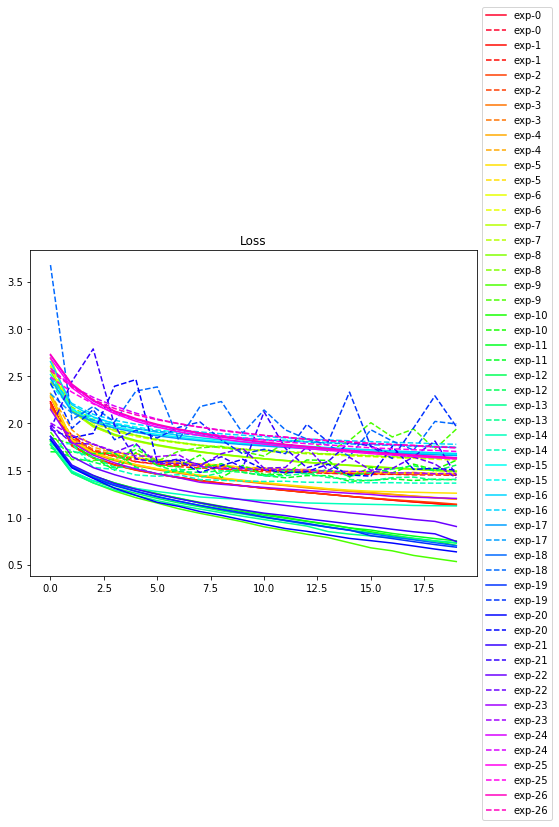

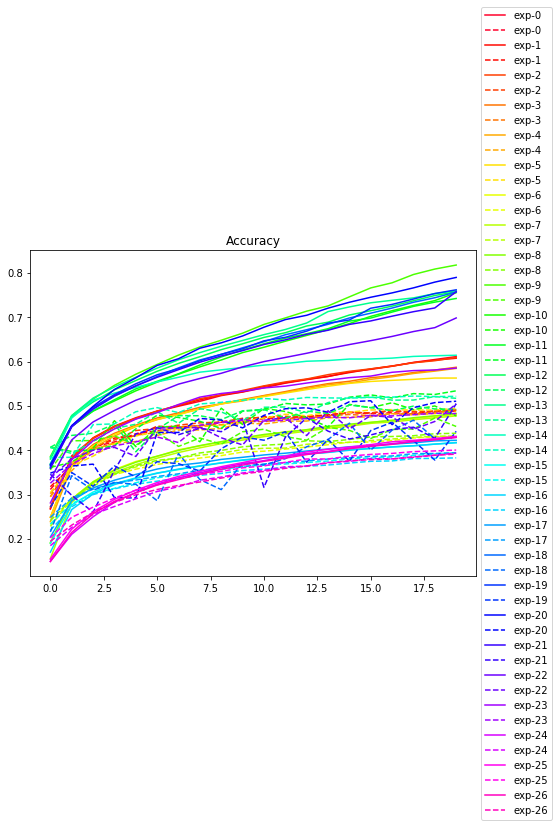

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()